In [1]:
import numpy as np # matematiksel işlemler için kullanılan kütüphane
import pandas as pd # veri işleme kütüphanesi

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
        print(os.path.join(dirname))


In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [3]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten 
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML
import os

In [5]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'  #kernel died şeklinde alınan hataya karşılık eklendi
print(tf.__version__) 

2.10.0


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

# Eğitim veri seti için ImageDataGenerator objesi oluşturur. 
#Bu, görüntülerde çeşitli rastgele dönüşümler (döndürme, ölçeklendirme, kaydırma vb.) uygular. 
# Bu teknik, modelin genelleme yeteneğini artırmak için kullanılır.
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
)
# Test veri seti için ImageDataGenerator objesi oluşturur. 
test_datagen = ImageDataGenerator(rescale=1./255)

# Eğitim veri setini okur, ölçeklendirir.
train_generator = train_datagen.flow_from_directory(
        'dataset/Cars_Dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)  
# Test veri setini okur, ölçeklendirir.
test_generator = test_datagen.flow_from_directory(
        'dataset/Cars_Dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)


Found 4514 images belonging to 7 classes.
Found 813 images belonging to 7 classes.


In [7]:
count=0
for image_batch, label_batch in train_generator:
    print(label_batch)
    print(image_batch[0])
    break  

[5. 6. 3. 0. 4. 5. 0. 6. 0. 6. 4. 4. 6. 6. 4. 5. 0. 0. 0. 0. 4. 4. 4. 4.
 4. 0. 6. 0. 5. 5. 3. 0.]
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [8]:
classes = list(train_generator.class_indices.keys())
classes

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break  #test veri üreteci için asıl çalıştığını ve ürettiği verinin nasıl göründüğünü gösterir.

[[[0.4901961  0.46274513 0.38823533]
  [0.654902   0.5686275  0.5176471 ]
  [0.6        0.48627454 0.46274513]
  ...
  [0.6666667  0.50980395 0.36862746]
  [0.6745098  0.5176471  0.37647063]
  [0.6745098  0.5176471  0.37647063]]

 [[0.52156866 0.49411768 0.42352945]
  [0.6156863  0.5294118  0.4784314 ]
  [0.58431375 0.47058827 0.44705886]
  ...
  [0.654902   0.49803925 0.35686275]
  [0.69803923 0.5411765  0.40000004]
  [0.6745098  0.5176471  0.37647063]]

 [[0.43921572 0.41176474 0.34117648]
  [0.5921569  0.5137255  0.47058827]
  [0.58431375 0.4784314  0.45098042]
  ...
  [0.6        0.43137258 0.29411766]
  [0.7137255  0.54509807 0.40784317]
  [0.63529414 0.4666667  0.32941177]]

 ...

 [[0.89019614 0.8470589  0.8235295 ]
  [0.90196085 0.8588236  0.8352942 ]
  [0.95294124 0.909804   0.8862746 ]
  ...
  [0.9294118  0.87843144 0.8431373 ]
  [0.89019614 0.83921576 0.80392164]
  [0.90196085 0.85098046 0.81568635]]

 [[1.         0.86666673 0.8196079 ]
  [0.78823537 0.627451   0.6117647 ]


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

sz = 128

# CNN başlatılır
model = Sequential()

# İlk evrişim katmanı ve havuzlama 
model.add(Conv2D(64, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# İkinci evrişim katmanı ve havuzlama
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Üçüncü evrişim katmanı
model.add(Conv2D(128, (3, 3), activation='relu'))

# Katmanları düzleştirme
model.add(Flatten())

# Tamamen bağlı bir katman ekleme
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=7, activation='softmax'))   #birimler, sınıf sayısıyla eşleşmesini doğrular


In [11]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 100352)            0

In [12]:

from tensorflow import keras
from tensorflow.keras.optimizers import Adam

# Öğrenme oranını belirler. Bu değer, her iterasyonda modelin ağırlıklarının ne kadar hızlı güncelleneceğini kontrol eder.
learning_rate = 0.001  

# Adam optimizer'ını belirlenen öğrenme oranıyla başlatır.
optimizer = Adam(learning_rate=learning_rate)

# Model derlenir. 
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

#Model eğitilir.
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=40
)


Epoch 1/40
142/142 [==============================] - 147s 1s/step - loss: 1.9050 - accuracy: 0.2193 - val_loss: 1.7893 - val_accuracy: 0.2694
Epoch 2/40
142/142 [==============================] - 90s 633ms/step - loss: 1.8280 - accuracy: 0.2634 - val_loss: 1.7658 - val_accuracy: 0.2854
Epoch 3/40
142/142 [==============================] - 85s 600ms/step - loss: 1.7712 - accuracy: 0.3026 - val_loss: 1.6733 - val_accuracy: 0.3518
Epoch 4/40
142/142 [==============================] - 107s 755ms/step - loss: 1.7259 - accuracy: 0.3221 - val_loss: 1.7180 - val_accuracy: 0.3592
Epoch 5/40
142/142 [==============================] - 103s 722ms/step - loss: 1.6734 - accuracy: 0.3454 - val_loss: 1.5849 - val_accuracy: 0.4182
Epoch 6/40
142/142 [==============================] - 97s 684ms/step - loss: 1.6481 - accuracy: 0.3697 - val_loss: 1.5903 - val_accuracy: 0.4268
Epoch 7/40
142/142 [==============================] - 87s 616ms/step - loss: 1.5980 - accuracy: 0.3937 - val_loss: 1.6736 - val_ac

In [13]:
#test veri seti üzerinde modelin performansını değerlendirir.
scores = model.evaluate(test_generator)

26/26 [==============================] - 4s 121ms/step - loss: 0.7729 - accuracy: 0.7134


In [14]:
scores

[0.7729179859161377, 0.7134071588516235]

In [15]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

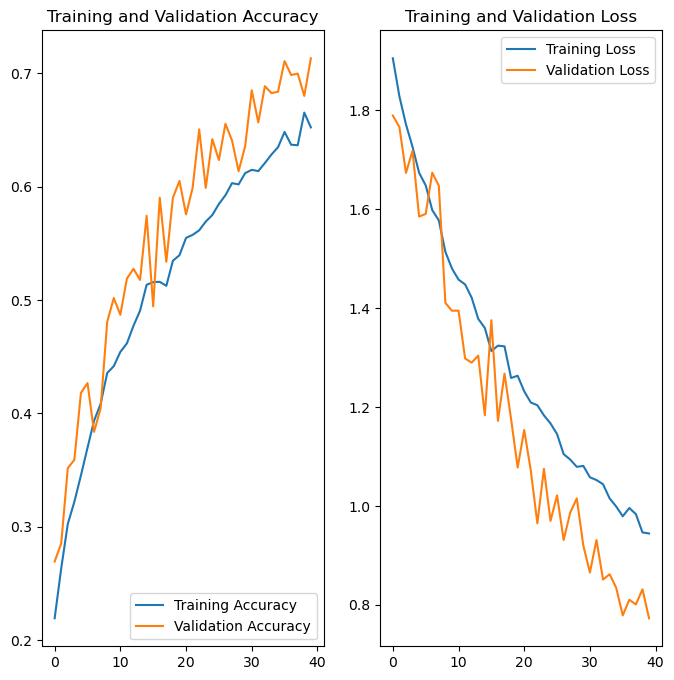

In [17]:
import matplotlib.pyplot as plt
EPOCHS = 40

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
def predict(model, img_path, classes):
    # Görüntüyü yükler, modelin beklediği şekle getirir ve piksel değerlerini normalize eder
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


In [19]:
plt.figure(figsize=(15, 15))

<Figure size 1500x1500 with 0 Axes>

<Figure size 1500x1500 with 0 Axes>

1/1 [==============================] - 0s 40ms/step


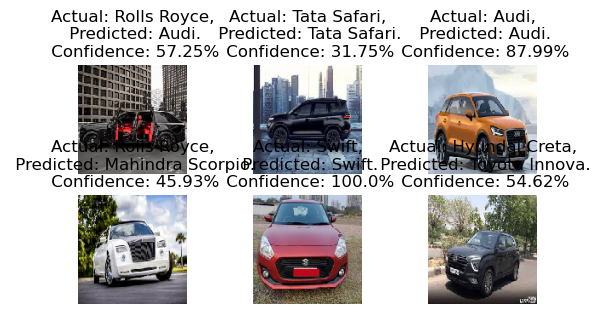

In [20]:
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i], classes)
        actual_class = classes[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [21]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Sabit değişkenler tanımlandı
IMAGE_SIZE = [224,224]
TRAIN_DIR = 'dataset/Cars_Dataset/train/*'

# Üst katmanları dışlayacak şekilde yapılandırılmış, önceden eğitilmiş VGG16 modeli yüklenir
base_model = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# VGG16'nın katmanlarını dondurulur
for layer in base_model.layers:
    layer.trainable = False

# Sınıf sayısını alınır
folders = glob(TRAIN_DIR)
num_classes = len(folders)

# Yeni katmanlar eklenir
x = Flatten()(base_model.output)
output = Dense(num_classes, activation='softmax')(x)

# Model tanımlanır
model = Model(inputs=base_model.input, outputs=output)

# Model derlenir
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# Modelin yapısı gösterilir
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# Eğitim için veri artırmalı ve eğitim/test için veri artırmasız veri oluşturucuları tanımlanır
train_datagen = ImageDataGenerator(rescale=1./255, shear_range = 0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Dizinler tanımlanır
TRAIN_DIR = 'dataset/Cars_Dataset/train/'
TEST_DIR = 'dataset/Cars_Dataset/test/'

# Görüntü özelliklerini tanımlanır
TARGET_SIZE = (224,224)
BATCH_SIZE = 32
CLASS_MODE = 'categorical'

# Eğitim verileri yüklenir
training_set = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE)

# Test verileri yüklenir
test_set = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE)

# Model fit parametreleri tanımlanır
EPOCHS = 10
STEPS_PER_EPOCH = len(training_set)
VALIDATION_STEPS = len(test_set)

# Model iyileştirilir
history = model.fit(
    training_set, 
    validation_data=test_set,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_steps=VALIDATION_STEPS)


Found 4514 images belonging to 7 classes.
Found 813 images belonging to 7 classes.
Epoch 1/10
142/142 [==============================] - 895s 6s/step - loss: 1.1602 - accuracy: 0.6256 - val_loss: 0.6040 - val_accuracy: 0.8044
Epoch 2/10
142/142 [==============================] - 928s 7s/step - loss: 0.5123 - accuracy: 0.8367 - val_loss: 0.4365 - val_accuracy: 0.8672
Epoch 3/10
142/142 [==============================] - 1020s 7s/step - loss: 0.3710 - accuracy: 0.8848 - val_loss: 0.4391 - val_accuracy: 0.8524
Epoch 4/10
142/142 [==============================] - 996s 7s/step - loss: 0.2785 - accuracy: 0.9156 - val_loss: 0.3211 - val_accuracy: 0.8991
Epoch 5/10
142/142 [==============================] - 1000s 7s/step - loss: 0.2269 - accuracy: 0.9280 - val_loss: 0.3107 - val_accuracy: 0.9028
Epoch 6/10
142/142 [==============================] - 1004s 7s/step - loss: 0.1893 - accuracy: 0.9440 - val_loss: 0.3300 - val_accuracy: 0.8844
Epoch 7/10
142/142 [==============================] - 94

In [25]:
from sklearn.metrics import classification_report
import numpy as np

# Etiketler ve tahminler için boş listeler oluşturulur
y_true = []
y_pred = []

# Test veri setinin her bir batch'i için tahminleri alınır
for i in range(len(test_set)):
    images, labels = next(test_set)
    pred_probs = model.predict(images)
    preds = np.argmax(pred_probs, axis=1)
    true_labels = np.argmax(labels, axis=1)

    y_true.extend(true_labels)
    y_pred.extend(preds)

# Sınıflandırma raporunu hesaplar ve yazdırır
class_labels = list(test_set.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)


1/1 [==============================] - 4s 4s/step
                  precision    recall  f1-score   support

            Audi       0.94      0.89      0.91       199
   Hyundai Creta       0.98      0.82      0.89        67
Mahindra Scorpio       0.96      0.93      0.95        75
     Rolls Royce       0.82      0.85      0.83        74
           Swift       0.92      0.93      0.93       102
     Tata Safari       0.84      0.97      0.90       106
   Toyota Innova       0.95      0.96      0.96       190

        accuracy                           0.92       813
       macro avg       0.92      0.91      0.91       813
    weighted avg       0.92      0.92      0.92       813



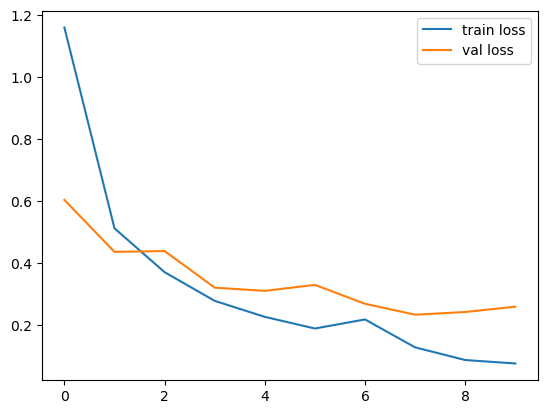

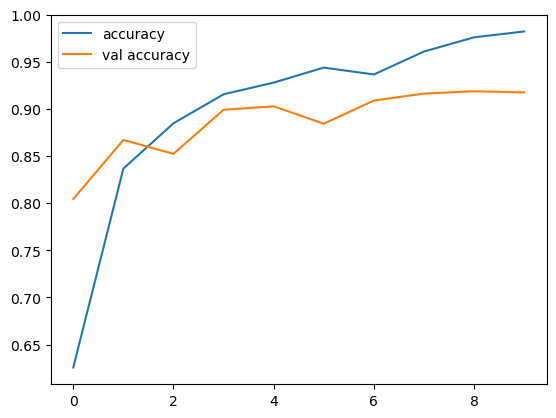

<Figure size 640x480 with 0 Axes>

In [27]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('train loss vs val loss')

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('accuracy vs val accuracy')

In [31]:
from sklearn.metrics import confusion_matrix
arr=confusion_matrix(y_true,y_pred)
arr

array([[177,   1,   0,  11,   0,   8,   2],
       [  1,  55,   2,   0,   4,   4,   1],
       [  2,   0,  70,   1,   0,   1,   1],
       [  5,   0,   0,  63,   1,   2,   3],
       [  3,   0,   1,   1,  95,   2,   0],
       [  0,   0,   0,   0,   1, 103,   2],
       [  1,   0,   0,   1,   2,   3, 183]], dtype=int64)

<Axes: >

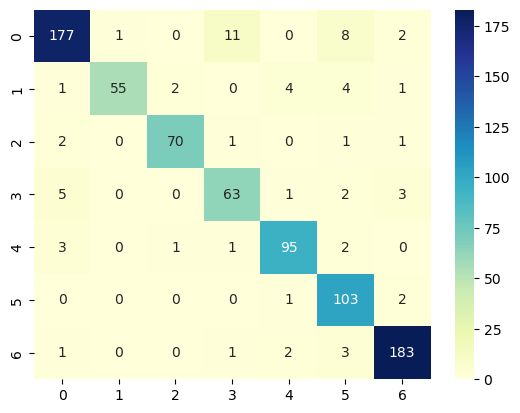

In [32]:
import seaborn as sn
df_cm = pd.DataFrame(arr, range(7), range(7))
sn.heatmap(df_cm, annot=True,fmt="d", cmap="YlGnBu")